In [3]:
import pandas as pd
import numpy as np

# Step 1: Loading Data

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://www.worldometers.info/population/countries-in-africa-by-population/"

# Simulate a browser request (avoid 403 error)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
}

# Send a GET request with headers
response = requests.get(url, headers=headers)

# Check if request was successful
if response.status_code == 200:
    # Parse HTML with BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Find the first table
    table = soup.find("table")

    # Convert table to Pandas DataFrame
    df = pd.read_html(str(table))[0]

    # Display the first few rows
    print(df.head())

else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


   # Country (or dependency)  Population (2025) Yearly Change Net Change  \
0  1                 Nigeria          237527782         2.08%    4848304   
1  2                Ethiopia          135472051         2.58%    3412284   
2  3                   Egypt          118365995         1.57%    1827737   
3  4                DR Congo          112832473         3.25%    3556208   
4  5                Tanzania           70545865          2.9%    1985708   

   Density (P/Km²)  Land Area (Km²) Migrants (net)  Fert. Rate  Median Age  \
0              261           910770        −15,258         4.3          18   
1              135          1000000          24054         3.8          19   
2              119           995450        −57,305         2.7          24   
3               50          2267050        −27,309         5.9          16   
4               80           885800        −12,730         4.5          17   

  Urban Pop % World Share  
0         55%       2.89%  
1         23%     

/var/folders/vl/rsv5f9jj0dx9_x6fw1tr04pm0000gn/T/ipykernel_9035/1918299603.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [5]:
df.to_csv("africa_population.csv", index=False)


# Step 2: Data Exploration

In [6]:
df.head()

,#,Country (or dependency),Population (2025),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,Nigeria,237527782,2.08%,4848304,261,910770,"−15,258",4.3,18,55%,2.89%
1,2,Ethiopia,135472051,2.58%,3412284,135,1000000,24054,3.8,19,23%,1.65%
2,3,Egypt,118365995,1.57%,1827737,119,995450,"−57,305",2.7,24,41%,1.44%
3,4,DR Congo,112832473,3.25%,3556208,50,2267050,"−27,309",5.9,16,45%,1.37%
4,5,Tanzania,70545865,2.9%,1985708,80,885800,"−12,730",4.5,17,40%,0.86%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        58 non-null     int64  
 1   Country (or dependency)  58 non-null     object 
 2   Population (2025)        58 non-null     int64  
 3   Yearly Change            58 non-null     object 
 4   Net Change               58 non-null     object 
 5   Density (P/Km²)          58 non-null     int64  
 6   Land Area (Km²)          58 non-null     int64  
 7   Migrants (net)           58 non-null     object 
 8   Fert. Rate               58 non-null     float64
 9   Median Age               58 non-null     int64  
 10  Urban Pop %              57 non-null     object 
 11  World Share              58 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 5.6+ KB


In [8]:
df.head()

,#,Country (or dependency),Population (2025),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,Nigeria,237527782,2.08%,4848304,261,910770,"−15,258",4.3,18,55%,2.89%
1,2,Ethiopia,135472051,2.58%,3412284,135,1000000,24054,3.8,19,23%,1.65%
2,3,Egypt,118365995,1.57%,1827737,119,995450,"−57,305",2.7,24,41%,1.44%
3,4,DR Congo,112832473,3.25%,3556208,50,2267050,"−27,309",5.9,16,45%,1.37%
4,5,Tanzania,70545865,2.9%,1985708,80,885800,"−12,730",4.5,17,40%,0.86%


In [9]:
df.dtypes

#                            int64
Country (or dependency)     object
Population (2025)            int64
Yearly Change               object
Net Change                  object
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)              object
Fert. Rate                 float64
Median Age                   int64
Urban Pop %                 object
World Share                 object
dtype: object

In [10]:
df = df.infer_objects()  # Convert objects to their best-matched types

In [11]:
df.dtypes

#                            int64
Country (or dependency)     object
Population (2025)            int64
Yearly Change               object
Net Change                  object
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)              object
Fert. Rate                 float64
Median Age                   int64
Urban Pop %                 object
World Share                 object
dtype: object

In [12]:
numbs = df.select_dtypes(exclude="object")
numbs

,#,Population (2025),Density (P/Km²),Land Area (Km²),Fert. Rate,Median Age
0,1,237527782,261,910770,4.3,18
1,2,135472051,135,1000000,3.8,19
2,3,118365995,119,995450,2.7,24
3,4,112832473,50,2267050,5.9,16
4,5,70545865,80,885800,4.5,17
5,6,64747319,53,1213090,2.2,29
6,7,57532493,101,569140,3.1,20
7,8,51662147,29,1765048,4.2,19
8,9,51384894,257,199810,4.1,17
9,10,47435312,20,2381740,2.7,29


In [13]:
stringer = df.select_dtypes(exclude=['int', 'float'])
stringer

,Country (or dependency),Yearly Change,Net Change,Migrants (net),Urban Pop %,World Share
0,Nigeria,2.08%,4848304,"−15,258",55%,2.89%
1,Ethiopia,2.58%,3412284,24054,23%,1.65%
2,Egypt,1.57%,1827737,"−57,305",41%,1.44%
3,DR Congo,3.25%,3556208,"−27,309",45%,1.37%
4,Tanzania,2.9%,1985708,"−12,730",40%,0.86%
5,South Africa,1.16%,740132,146370,67%,0.79%
6,Kenya,1.95%,1099549,"−27,330",32%,0.70%
7,Sudan,2.4%,1213184,291469,35%,0.63%
8,Uganda,2.74%,1369802,"−119,059",30%,0.62%
9,Algeria,1.33%,621004,"−27,531",74%,0.58%


In [14]:
df.columns

Index(['#', 'Country (or dependency)', 'Population (2025)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [15]:
df['Net Change'] = pd.to_numeric(df['Net Change'].str.replace('-', '-').str.replace(',', ''), errors='coerce')


In [16]:
df.dtypes

#                            int64
Country (or dependency)     object
Population (2025)            int64
Yearly Change               object
Net Change                 float64
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)              object
Fert. Rate                 float64
Median Age                   int64
Urban Pop %                 object
World Share                 object
dtype: object

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

## STEP 3: CLEANING DATA 

In [18]:
# STEP 3: CLEAN DATA 
# Rename columns for clarity
df.columns = ["#", "Country", "Population_2023", "Yearly_Change", "Net_Change", "Density", "Area",
              "Migrants", "Fertility_Rate", "Median_Age", "Urban_Pop", "World_Share"]


In [19]:
# Drop '#' column as it's just a rank
df = df.drop(columns=["#"])

In [20]:
# ✅ Remove '%' sign from "Yearly Change" and convert to float
df["Yearly_Change"] = pd.to_numeric(df["Yearly_Change"].str.replace('-', '-').str.replace(',', ''), errors='coerce')

In [21]:
# List of numeric columns
numeric_cols = ["Population_2023", "Net_Change", "Density", "Area", "Migrants", 
                "Fertility_Rate", "Median_Age", "Urban_Pop", "World_Share"]

for col in numeric_cols:
    df[col] = (df[col].astype(str)
                         .str.replace('−', '-', regex=True)  # Fix special minus
                         .str.replace(',', '', regex=True)   # Remove commas
                         .str.replace('%', '', regex=True)   # Remove percentage signs
                         .replace('', '0')                   # Replace empty strings with '0'
                         .astype(float))                     # Convert to float


## STEP 4: GET DESCRIPTIVE STATISTICS 

In [22]:

print("Descriptive Statistics:")
df.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Population_2023,58.0,2.672185e+07,4.076189e+07,5197.000000,2.569874e+06,1.447967e+07,32733395.25,2.375278e+08
Yearly_Change,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net_Change,56.0,6.201726e+05,9.326182e+05,2361.000000,6.012325e+04,3.293195e+05,743997.25,4.848304e+06
Density,58.0,1.343103e+02,1.792072e+02,2.000000,2.900000e+01,7.100000e+01,134.00,8.990000e+02
Area,58.0,5.111807e+05,5.848486e+05,375.000000,2.868000e+04,2.698000e+05,814062.50,2.381740e+06
Migrants,58.0,-6.513534e+03,5.249711e+04,-123104.000000,-1.534875e+04,-5.410000e+03,-42.25,2.914690e+05
Fertility_Rate,58.0,3.651724e+00,1.144819e+00,1.200000,2.700000e+00,3.750000e+00,4.20,5.900000e+00
Median_Age,58.0,2.167241e+01,6.865597e+00,14.000000,1.800000e+01,1.900000e+01,22.00,5.100000e+01
Urban_Pop,57.0,4.929825e+01,1.892840e+01,15.000000,3.500000e+01,4.600000e+01,64.00,9.700000e+01
World_Share,58.0,3.253338e-01,4.959144e-01,0.000063,3.125000e-02,1.750000e-01,0.40,2.890000e+00


# STEP 5: FIND DEFAULT CORRELATIONS

In [23]:
# STEP 5: FIND DEFAULT CORRELATIONS
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                 Population_2023  Yearly_Change  Net_Change   Density  \
Population_2023         1.000000            NaN    0.960606 -0.044551   
Yearly_Change                NaN            NaN         NaN       NaN   
Net_Change              0.960606            NaN    1.000000 -0.037909   
Density                -0.044551            NaN   -0.037909  1.000000   
Area                    0.481102            NaN    0.501911 -0.407305   
Migrants                0.017805            NaN   -0.009063 -0.049113   
Fertility_Rate          0.198767            NaN    0.326733 -0.095162   
Median_Age             -0.188145            NaN   -0.273180  0.065462   
Urban_Pop              -0.150138            NaN   -0.238256 -0.315826   
World_Share             0.999991            NaN    0.960297 -0.045140   

                     Area  Migrants  Fertility_Rate  Median_Age  Urban_Pop  \
Population_2023  0.481102  0.017805        0.198767   -0.188145  -0.150138   
Yearly_Change         NaN       NaN     

In [ ]:
#we can also check the correlation in regards to  Net_Change
#this is valuable especially when we are trying to build an ML algo for that outcome
numeric_df.corr(method='pearson')['Net_Change']

Population_2023    0.960606
Yearly_Change           NaN
Net_Change         1.000000
Density           -0.037909
Area               0.501911
Migrants          -0.009063
Fertility_Rate     0.326733
Median_Age        -0.273180
Urban_Pop         -0.238256
World_Share        0.960297
Name: Net_Change, dtype: float64

In [27]:
numeric_df.corr(method='pearson')['Fertility_Rate']

Population_2023    0.198767
Yearly_Change           NaN
Net_Change         0.326733
Density           -0.095162
Area               0.329636
Migrants          -0.137313
Fertility_Rate     1.000000
Median_Age        -0.823230
Urban_Pop         -0.364807
World_Share        0.198363
Name: Fertility_Rate, dtype: float64

In [ ]:
numeric_df.corr()

,Population_2023,Yearly_Change,Net_Change,Density,Area,Migrants,Fertility_Rate,Median_Age,Urban_Pop,World_Share
Population_2023,1.000000,NaN,0.960606,-0.044551,0.481102,0.017805,0.198767,-0.188145,-0.150138,0.999991
Yearly_Change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Net_Change,0.960606,NaN,1.000000,-0.037909,0.501911,-0.009063,0.326733,-0.273180,-0.238256,0.960297
Density,-0.044551,NaN,-0.037909,1.000000,-0.407305,-0.049113,-0.095162,0.065462,-0.315826,-0.045140
Area,0.481102,NaN,0.501911,-0.407305,1.000000,0.173969,0.329636,-0.175410,0.036719,0.481699
Migrants,0.017805,NaN,-0.009063,-0.049113,0.173969,1.000000,-0.137313,0.108805,0.097335,0.018487
Fertility_Rate,0.198767,NaN,0.326733,-0.095162,0.329636,-0.137313,1.000000,-0.823230,-0.364807,0.198363
Median_Age,-0.188145,NaN,-0.273180,0.065462,-0.175410,0.108805,-0.823230,1.000000,0.289649,-0.187781
Urban_Pop,-0.150138,NaN,-0.238256,-0.315826,0.036719,0.097335,-0.364807,0.289649,1.000000,-0.150085
World_Share,0.999991,NaN,0.960297,-0.045140,0.481699,0.018487,0.198363,-0.187781,-0.150085,1.000000


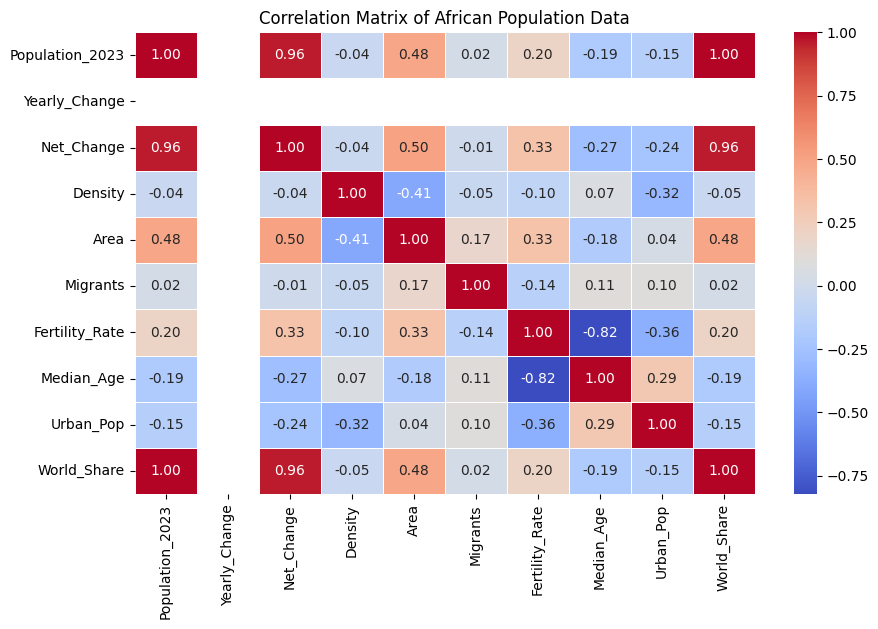

In [ ]:
# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of African Population Data")
plt.show()

# LINEAR REGRESSION

In [ ]:
# Select two numeric features
X = df[['Population_2023']]  # Independent variable
y = df['Net_Change']         # Dependent variable


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
# Print results
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.9325
Mean Squared Error: 153655020718.9909


R-squared (R²) = 0.9325
R² is the coefficient of determination, which measures how well the regression model fits the data.

0.9325 means 93.25% of the variation in Net_Change is explained by Population_2023.

This is very high, indicating a strong relationship between the two variables.



Mean Squared Error (MSE) = 153,655,020,718.99
MSE measures the average squared difference between actual (y_test) and predicted (y_pred) values.

A lower MSE means better predictions.

However, the MSE is a large number because data values for population are large.

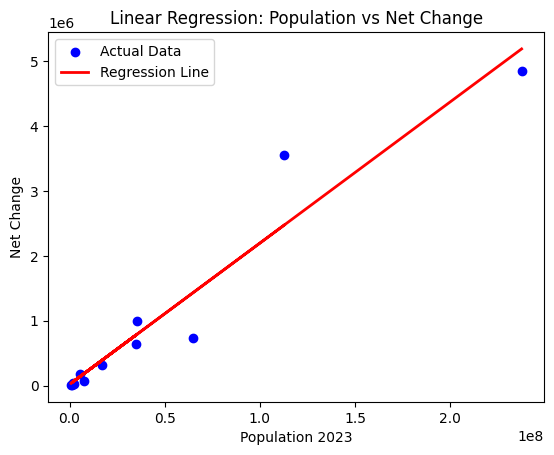

In [ ]:
# Plot regression line
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Population 2023")
plt.ylabel("Net Change")
plt.title("Linear Regression: Population vs Net Change")
plt.legend()
plt.show()

# Multiple Linear Regression

In [ ]:
# Define dependent (y) and independent (X) variables
X = df[["Population_2023", "Density", "Area", "Migrants", 
        "Fertility_Rate", "Median_Age", "Urban_Pop", "World_Share"]]  # Independent variables
y = df["Net_Change"]  # Dependent variable

# Handle missing values (optional)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R-squared: 0.9461
Mean Squared Error: 122596369924.5215


# VISUALISR RESULTS

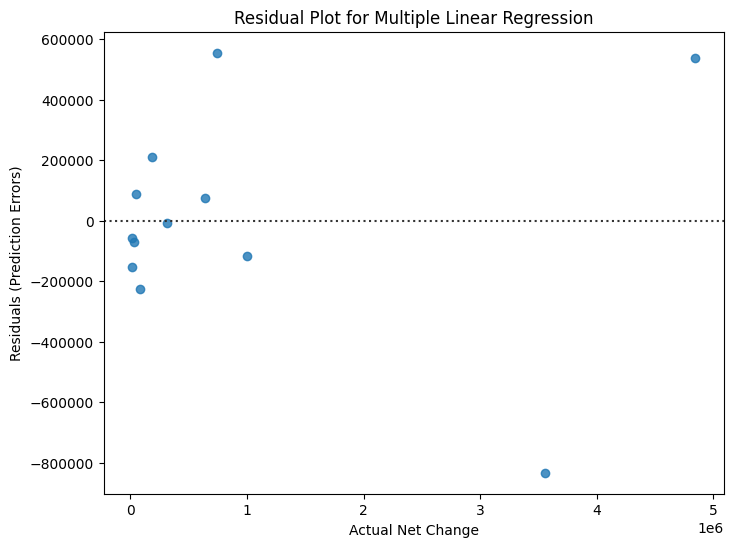

In [ ]:
# Residual Plot (Error Analysis)
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred - y_test, line_kws={"color": "red"})
plt.xlabel("Actual Net Change")
plt.ylabel("Residuals (Prediction Errors)")
plt.title("Residual Plot for Multiple Linear Regression")
plt.show()


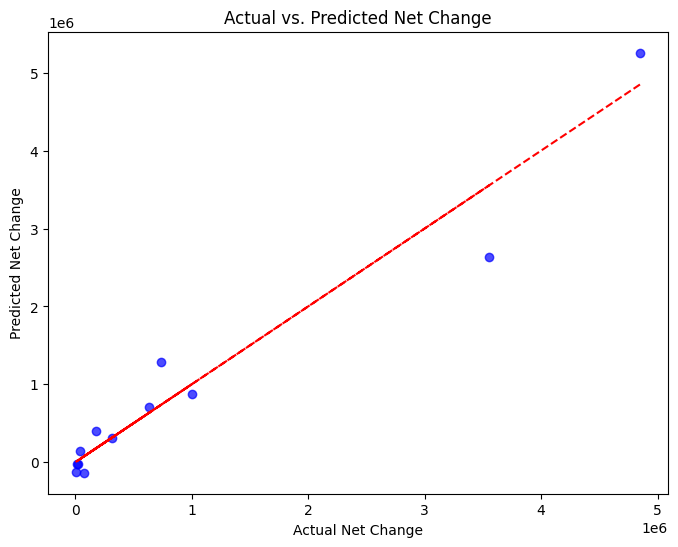

In [ ]:
# Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot(y_test, y_test, color="red", linestyle="--")  # Perfect Fit Line
plt.xlabel("Actual Net Change")
plt.ylabel("Predicted Net Change")
plt.title("Actual vs. Predicted Net Change")
plt.show()


# Polynomial  Regression model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
# Ensure Median Age and Fertility Rate columns are numeric
df["Median_Age"] = df["Median_Age"].astype(str).str.replace(',', '').astype(float)
df["Fertility_Rate"] = df["Fertility_Rate"].astype(str).str.replace(',', '').astype(float)


In [ ]:
# Extract features
X = df[["Median_Age"]].values  # Independent variable
y = df["Fertility_Rate"].values  # Dependent variable

In [ ]:
# Create polynomial features (degree = 2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
# Train polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_poly)


In [ ]:
# Compute R-squared and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

In [ ]:
# Print metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.8451
Mean Squared Error: 0.1995


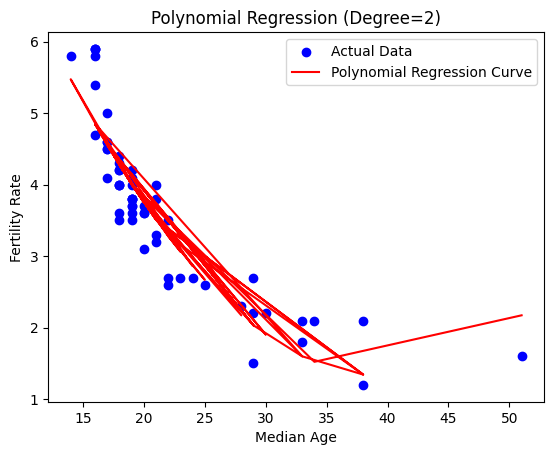

In [ ]:
# Visualization
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Polynomial Regression Curve")
plt.xlabel("Median Age")
plt.ylabel("Fertility Rate")
plt.title("Polynomial Regression (Degree=2)")
plt.legend()
plt.show()

This plot shows the relationship between Median Age (x-axis) and Fertility Rate (y-axis) using a polynomial regression model (degree=2).

Observations:
Blue Dots (Actual Data)

These represent the actual values of fertility rate for different median ages.

The trend shows that as the median age increases, the fertility rate generally decreases.

Red Line (Polynomial Regression Curve)

This represents the model’s predicted fertility rate based on the polynomial regression.

The curve fits the data but appears too wiggly and unstable, especially toward the right side.

This suggests that the model might be overfitting—it is capturing too much noise rather than the actual trend.


The curve starts rising again beyond 35+ median age, which does not match real-world fertility trends.

This suggests the model fails to generalize well for unseen data.